In [10]:
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

#TODO: just make it a package
import sys
sys.path.append("..")

from tiny_xgboost import TinyXGBRegressor

In [11]:
def small_X_y_data(n_samples=5_000):
    """Small set of X, y data (single feature)"""

    def true_function(X):
        return np.sin(3 * X)

    def true_noise_scale(X):
        return np.abs(np.cos(X))

    np.random.seed(1234)
    X = np.random.uniform(-2, -1, n_samples)
    y = true_function(X) + np.random.normal(scale=true_noise_scale(X), size=n_samples)

    return X[..., np.newaxis], y


In [22]:
X, y = small_X_y_data(1_500)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)

In [23]:

model = TinyXGBRegressor(
    objective="distribution:normal",
    max_depth=2,
    n_estimators=10000,
    early_stopping_rounds=5,
    learning_rate=0.0001,
)
model.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    verbose=True,
)
preds = model.predict(X_test)
loc, scale = preds[:, 0], preds[:, 1]

[0]	train-loss=1.45559, val-loss=1.45574
[1]	train-loss=1.45471, val-loss=1.45487
[2]	train-loss=1.45383, val-loss=1.45400
[3]	train-loss=1.45295, val-loss=1.45313
[4]	train-loss=1.45208, val-loss=1.45226
[5]	train-loss=1.45120, val-loss=1.45139
[6]	train-loss=1.45033, val-loss=1.45052
[7]	train-loss=1.44946, val-loss=1.44965
[8]	train-loss=1.44859, val-loss=1.44879
[9]	train-loss=1.44772, val-loss=1.44792
[10]	train-loss=1.44685, val-loss=1.44706
[11]	train-loss=1.44598, val-loss=1.44620
[12]	train-loss=1.44511, val-loss=1.44534
[13]	train-loss=1.44424, val-loss=1.44448
[14]	train-loss=1.44338, val-loss=1.44362
[15]	train-loss=1.44251, val-loss=1.44276
[16]	train-loss=1.44165, val-loss=1.44190
[17]	train-loss=1.44079, val-loss=1.44104
[18]	train-loss=1.43993, val-loss=1.44019
[19]	train-loss=1.43906, val-loss=1.43933
[20]	train-loss=1.43821, val-loss=1.43848
[21]	train-loss=1.43735, val-loss=1.43763
[22]	train-loss=1.43649, val-loss=1.43678
[23]	train-loss=1.43563, val-loss=1.43593
[2

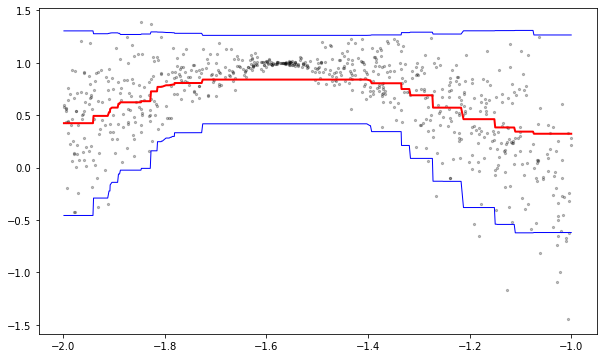

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

idx = X_test[:, 0].argsort().squeeze()

ax.scatter(X_test, y_test, s=5.0, alpha=0.25, c="k", label="data")
ax.plot(X_test[idx], loc[idx], c="r", linewidth=2.0)
ax.plot(X_test[idx], loc[idx] + scale[idx], c="b", linewidth=1.0)
ax.plot(X_test[idx], loc[idx] - scale[idx], c="b", linewidth=1.0)

plt.show()